## Final Project Submission

Please fill out:
* Student name: ALFRED RICKY OTIENO
* Student pace: PART TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Phase 2 Data Science Project


Here’s a detailed **Project Overview** and **Business Problem** that you can use as an introduction for your project in a Markdown format. It will set the stage for the analysis and showcase the relevance of the work in the context of the movie industry.

---

# Project Overview and Business Problem

## Project Overview

The movie industry is a multi-billion-dollar global enterprise, with thousands of films being produced and distributed across various platforms each year. From blockbuster franchises to independent films, studios invest heavily in production, marketing, and distribution, all with the goal of maximizing box office revenues. However, the success of a film is far from guaranteed, as financial performance can be influenced by a variety of factors such as **production budgets**, **genres**, **ratings**, and **release strategies**. 

In this project, we will explore and analyze a large dataset of movies, combining various sources of financial data (e.g., **production budgets**, **domestic and foreign grosses**, and **worldwide earnings**) with **movie metadata** (e.g., **genres**, **ratings**, **runtime**, and **studios**) to uncover trends and relationships. Through exploratory data analysis, statistical modeling, and data visualizations, we aim to derive actionable insights that can guide **strategic decisions** for movie studios, production companies, and distributors.

Our analysis will focus on identifying patterns that can help stakeholders understand **what makes a movie financially successful**. Specifically, we will explore:
- How **production budgets** influence worldwide and regional gross revenues.
- Which **genres** and **ratings** tend to perform better in both domestic and international markets.
- The impact of movie **runtime** and **release strategy** on profitability.
- **Outliers** and anomalies, such as movies that have either underperformed or overperformed relative to their production budgets.
- Temporal trends in the movie industry, such as the rise in production budgets or changes in audience preferences over time.

Ultimately, this project seeks to provide studios and filmmakers with data-driven recommendations to help optimize their investments and improve their chances of box office success.

---

## Business Problem

The movie business is notorious for its unpredictability, with some movies grossing billions of dollars while others barely recoup their production costs. Despite the high stakes, **strategic decisions in the industry often rely on intuition and past experiences** rather than a thorough analysis of the underlying data. This raises a critical business problem: 

**How can studios maximize the return on investment (ROI) for their films by leveraging data-driven insights?**

### Key Questions Addressed:
- **What is the optimal production budget** for maximizing box office revenue? Does a higher budget always guarantee better returns, or is there a “sweet spot” for production investments?
- **Which genres** are most likely to succeed both domestically and internationally, and how can studios target specific genres for different markets?
- **How do movie ratings** (e.g., G, PG-13, R) influence a movie's financial success, and what audience segments should studios aim for based on historical performance?
- **Are there outliers** in the data—movies that defied conventional wisdom by overperforming or underperforming relative to their budget? What lessons can be learned from these anomalies?
- **How has the industry evolved over time**? Are production budgets and box office revenues rising, and how can studios adapt to changing audience preferences and market conditions?

### Importance to Stakeholders:
- **Movie Studios and Production Companies**: By understanding the relationship between production budgets, genre, ratings, and gross earnings, studios can make more informed decisions on how to allocate resources for their future projects.
- **Distributors and Marketers**: Data-driven insights on audience preferences and the performance of different movie ratings and genres will help marketing teams target the right audiences and optimize release strategies.
- **Investors**: Understanding the financial dynamics of movie production will allow investors to back projects that have a higher likelihood of success, reducing financial risk.

---

By addressing these critical business questions, this project aims to bridge the gap between **intuition** and **data-driven decision making** in the movie industry. The findings will empower studios, producers, and distributors to make more **informed strategic choices** that improve their chances of financial success and audience engagement.



## Data Loading and Understanding

In this phase, we will load multiple datasets and inspect their structure. This will help us understand what kind of data we are working with and what needs to be cleaned or transformed before analysis.


In [124]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




### Loading Datasets

We will now load the following datasets:
- `bom.movie_gross.csv.gz`: Box Office Mojo data for movie gross revenue.
- `rt.movie_info.tsv.gz`: Rotten Tomatoes movie information.
- `rt.reviews.tsv.gz`: Rotten Tomatoes reviews.
- `tmdb.movies.csv.gz`: TMDB movie data.
- `tn.movie_budgets.csv.gz`: The Numbers movie budget data.


In [125]:

# Loading CSV and TSV files with specific encoding to handle potential encoding issues
bom_movie_gross = pd.read_csv('bom.movie_gross.csv', encoding='ISO-8859-1')
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t', encoding='ISO-8859-1')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv', encoding='ISO-8859-1')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv', encoding='ISO-8859-1')


### Data Understanding

Next, we will explore the basic structure of each dataset using `.info()`. This will give us an overview of the number of entries, columns, data types, and missing values, which is essential for planning the data cleaning process.

In [126]:
# Display initial information about the datasets
print("BOM Movie Gross Info:")
bom_movie_gross.info()

print("\nRT Movie Info:")
rt_movie_info.info()

print("\nRT Reviews Info:")
rt_reviews.info()

print("\nTMDB Movies Info:")
tmdb_movies.info()

print("\nTN Movie Budgets Info:")
tn_movie_budgets.info()


BOM Movie Gross Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

RT Movie Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null  

## Data Cleaning

In this phase, we will clean the datasets by handling missing values, converting data types, and preparing the data for analysis. This step is crucial to ensure that we can perform accurate analysis without errors.


In [127]:
# 1. Handling missing values in rt_movie_info dataset

# Step 1: Fill missing values in 'director' and 'writer' with 'Unknown'
rt_movie_info['director'].fillna('Unknown', inplace=True)
rt_movie_info['writer'].fillna('Unknown', inplace=True)

# Step 2: Convert release dates to datetime format
rt_movie_info['theater_date'] = pd.to_datetime(rt_movie_info['theater_date'], errors='coerce')
rt_movie_info['dvd_date'] = pd.to_datetime(rt_movie_info['dvd_date'], errors='coerce')

# Step 3: Clean 'runtime' column by removing non-numeric characters (e.g., 'minutes')
# We'll extract the numeric part from the 'runtime' column
rt_movie_info['runtime'] = rt_movie_info['runtime'].str.extract('(\d+)').astype(float)

# Step 4: Fill missing runtime values with the median runtime
rt_movie_info['runtime'] = rt_movie_info['runtime'].fillna(rt_movie_info['runtime'].median())

# Step 5: Drop rows where essential information (like 'id') is missing
rt_movie_info.dropna(subset=['id'], inplace=True)

# Step 6: Remove duplicates
rt_movie_info.drop_duplicates(inplace=True)

# Final check for missing values in rt_movie_info
print("\nMissing values in rt_movie_info after cleaning:")
print(rt_movie_info.isnull().sum())



Missing values in rt_movie_info after cleaning:
id                 0
synopsis          62
rating             3
genre              8
director           0
writer             0
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime            0
studio          1066
dtype: int64


In [128]:
# 2. Cleaning bom_movie_gross dataset

# Remove non-numeric characters from 'foreign_gross' and 'domestic_gross'
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)
bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values in 'foreign_gross' and 'domestic_gross' with 0 (assuming no earnings reported)
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross['domestic_gross'].fillna(0, inplace=True)

# Drop duplicates in bom_movie_gross
bom_movie_gross.drop_duplicates(inplace=True)

# Final check for missing values in bom_movie_gross
print("\nMissing values in bom_movie_gross after cleaning:")
print(bom_movie_gross.isnull().sum())



Missing values in bom_movie_gross after cleaning:
title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [129]:
# 3. Cleaning tn_movie_budgets dataset

# Remove non-numeric characters from 'production_budget', 'domestic_gross', and 'worldwide_gross'
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values in financial columns with 0
tn_movie_budgets['production_budget'].fillna(0, inplace=True)
tn_movie_budgets['domestic_gross'].fillna(0, inplace=True)
tn_movie_budgets['worldwide_gross'].fillna(0, inplace=True)

# Drop duplicates in tn_movie_budgets
tn_movie_budgets.drop_duplicates(inplace=True)

# Final check for missing values in tn_movie_budgets
print("\nMissing values in tn_movie_budgets after cleaning:")
print(tn_movie_budgets.isnull().sum())



Missing values in tn_movie_budgets after cleaning:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [130]:
# 4. Cleaning rt_reviews dataset

# Fill missing values in 'rating' and 'review' columns
rt_reviews['rating'].fillna('Not Rated', inplace=True)
rt_reviews['review'].fillna('No Review', inplace=True)

# Drop rows where 'id' is missing (as 'id' is essential)
rt_reviews.dropna(subset=['id'], inplace=True)

# Drop duplicates in rt_reviews
rt_reviews.drop_duplicates(inplace=True)

# Final check for missing values in rt_reviews
print("\nMissing values in rt_reviews after cleaning:")
print(rt_reviews.isnull().sum())



Missing values in rt_reviews after cleaning:
id               0
review           0
rating           0
fresh            0
critic        2713
top_critic       0
publisher      309
date             0
dtype: int64


In [131]:
# 4. Cleaning tmdb_movies dataset

# Check for non-numeric columns that need conversion or cleaning
# For now, we assume that 'popularity', 'vote_average', and 'vote_count' are numeric
# But let's confirm they are properly formatted and handle any missing values

# Convert 'release_date' to datetime format
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')

# Handle missing values in numeric columns (like 'popularity', 'vote_average', 'vote_count')
tmdb_movies['popularity'].fillna(tmdb_movies['popularity'].median(), inplace=True)
tmdb_movies['vote_average'].fillna(tmdb_movies['vote_average'].median(), inplace=True)
tmdb_movies['vote_count'].fillna(tmdb_movies['vote_count'].median(), inplace=True)

# Fill missing values in 'original_language' and 'title' with placeholders like 'Unknown'
tmdb_movies['original_language'].fillna('Unknown', inplace=True)
tmdb_movies['title'].fillna('Unknown', inplace=True)

# Drop duplicates in tmdb_movies
tmdb_movies.drop_duplicates(inplace=True)

# Final check for missing values in tmdb_movies
print("\nMissing values in tmdb_movies after cleaning:")
print(tmdb_movies.isnull().sum())



Missing values in tmdb_movies after cleaning:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [132]:
# Final Check for Duplicates and Missing Values Across All Datasets
print("\nFinal Check for duplicates and missing values across all datasets:")

datasets = {'bom_movie_gross': bom_movie_gross, 
            'rt_movie_info': rt_movie_info, 
            'tn_movie_budgets': tn_movie_budgets, 
            'rt_reviews': rt_reviews}

for name, df in datasets.items():
    print(f"\n{name} Duplicates: {df.duplicated().sum()}")
    print(f"{name} Missing Values:\n{df.isnull().sum()}")



Final Check for duplicates and missing values across all datasets:

bom_movie_gross Duplicates: 0
bom_movie_gross Missing Values:
title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

rt_movie_info Duplicates: 0
rt_movie_info Missing Values:
id                 0
synopsis          62
rating             3
genre              8
director           0
writer             0
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime            0
studio          1066
dtype: int64

tn_movie_budgets Duplicates: 0
tn_movie_budgets Missing Values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

rt_reviews Duplicates: 0
rt_reviews Missing Values:
id               0
review           0
rating           0
fresh            0
critic        2713
top_critic       0
publisher      309
date             0
dtype: int6

# 1. Handling Missing Values in bom_movie_gross
From the final check, we see that there are 5 missing values in the studio column. Since missing values in studio represent the studio that produced the movie, there are several approaches:

Option 1: Fill missing values with 'Unknown' (this is common for missing categorical data).
Option 2: Drop the rows if studio information is essential for analysis.
In this case, we'll fill the missing values with 'Unknown' to avoid losing data.

In [133]:
# Handling missing values in 'bom_movie_gross'

# Fill missing values in 'studio' with 'Unknown'
bom_movie_gross['studio'].fillna('Unknown', inplace=True)

# Verify if there are still any missing values
print("\nMissing values in bom_movie_gross after filling missing studio values:")
print(bom_movie_gross.isnull().sum())



Missing values in bom_movie_gross after filling missing studio values:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


# 2. Handling Missing Values in rt_movie_info

  * **synopsis**: We can fill the missing values with a placeholder like 'No Synopsis Available'.

  * **rating**, **genre**: Fill with 'Unknown'.

  * **theater_date**, **dvd_date**: These are dates, and it might be best to leave them as NaT (missing dates).

  * **currency**, **box_office**, **studio**: Fill currency and box_office with 'Unknown' or 0 where applicable.

  * **runtime**: Fill missing runtime with the median runtime value.

In [134]:
# Handling missing values in 'rt_movie_info'

# Fill missing synopsis with 'No Synopsis Available'
rt_movie_info['synopsis'].fillna('No Synopsis Available', inplace=True)

# Fill missing 'rating' and 'genre' with 'Unknown'
rt_movie_info['rating'].fillna('Unknown', inplace=True)
rt_movie_info['genre'].fillna('Unknown', inplace=True)

# Fill 'currency' and 'box_office' with 'Unknown' or 0 for box_office
rt_movie_info['currency'].fillna('Unknown', inplace=True)
rt_movie_info['box_office'].fillna(0, inplace=True)

# Fill missing runtime with the median value
rt_movie_info['runtime'].fillna(rt_movie_info['runtime'].median(), inplace=True)

# Fill missing 'studio' with 'Unknown'
rt_movie_info['studio'].fillna('Unknown', inplace=True)

# Verify if missing values are resolved
print("\nMissing values in rt_movie_info after cleaning:")
print(rt_movie_info.isnull().sum())



Missing values in rt_movie_info after cleaning:
id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date    359
dvd_date        359
currency          0
box_office        0
runtime           0
studio            0
dtype: int64


 # 3. Handling Missing Values in rt_reviews

 * **review** and **rating**: Missing reviews and ratings can be filled with placeholders like 'No Review' and 'Not Rated'.
 * **critic**, **publisher**: We can fill with 'Unknown Critic' and 'Unknown Publisher'.



In [135]:
# Handling missing values in 'rt_reviews'

# Fill missing 'review' with 'No Review'
rt_reviews['review'].fillna('No Review', inplace=True)

# Fill missing 'rating' with 'Not Rated'
rt_reviews['rating'].fillna('Not Rated', inplace=True)

# Fill missing 'critic' and 'publisher' with 'Unknown Critic' and 'Unknown Publisher'
rt_reviews['critic'].fillna('Unknown Critic', inplace=True)
rt_reviews['publisher'].fillna('Unknown Publisher', inplace=True)

# Verify if missing values are resolved
print("\nMissing values in rt_reviews after cleaning:")
print(rt_reviews.isnull().sum())



Missing values in rt_reviews after cleaning:
id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64


# 4. Handling Missing Values in tmdb_movies

 * **original_language**: We can fill with 'Unknown'.
 * **release_date**: For missing release dates, we can leave them as NaT or drop the rows if dates are essential.

In [136]:
# Handling missing values in 'tmdb_movies'

# Fill missing 'original_language' with 'Unknown'
tmdb_movies['original_language'].fillna('Unknown', inplace=True)

# Drop rows with missing 'release_date' if it's essential, or leave them as NaT
# In this case, we'll leave them as NaT to preserve the rows
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')

# Verify if missing values are resolved
print("\nMissing values in tmdb_movies after cleaning:")
print(tmdb_movies.isnull().sum())



Missing values in tmdb_movies after cleaning:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


# Final Check Across All Datasets:
After cleaning all datasets, we’ll run the final check to confirm that all missing values have been addressed.

In [137]:
# Final Check for Missing Values and Duplicates After Cleaning
print("\nFinal Check for duplicates and missing values across all datasets:")

datasets = {'bom_movie_gross': bom_movie_gross, 
            'rt_movie_info': rt_movie_info, 
            'tn_movie_budgets': tn_movie_budgets, 
            'rt_reviews': rt_reviews,
            'tmdb_movies': tmdb_movies}

for name, df in datasets.items():
    print(f"\n{name} Duplicates: {df.duplicated().sum()}")
    print(f"{name} Missing Values:\n{df.isnull().sum()}")



Final Check for duplicates and missing values across all datasets:

bom_movie_gross Duplicates: 0
bom_movie_gross Missing Values:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

rt_movie_info Duplicates: 0
rt_movie_info Missing Values:
id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date    359
dvd_date        359
currency          0
box_office        0
runtime           0
studio            0
dtype: int64

tn_movie_budgets Duplicates: 0
tn_movie_budgets Missing Values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

rt_reviews Duplicates: 0
rt_reviews Missing Values:
id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

tmdb_movies Duplicates: 0
tmdb_mo

## Exploratory Data Analysis (EDA)

Now that the data is clean, we will explore the datasets to understand key insights. We will begin by looking at the distributions of movie revenues, production budgets, and ratings. We will also examine the relationships between various numerical features.

**Structure of the EDA Section:**

* **Distribution of Key Numerical Variables:**
Explore the distribution of key numerical variables such as domestic_gross, foreign_gross, production_budget, and popularity.

* **Correlation Analysis:**
Understand how different numerical variables (e.g., budget, gross, popularity) are related using correlation matrices and scatter plots.

* **Categorical Analysis:**
Analyze categorical variables like genre, studio, rating, and their impact on numerical values (e.g., gross earnings, popularity).

* **Trend Analysis:**
Explore trends over time by analyzing variables like release_date and year to understand how the movie industry evolves.

* **Visualizations:**
We’ll use visualizations such as histograms, bar plots, scatter plots, and box plots to bring the insights to life.

# 1. Distribution of Key Numerical Variables

We’ll begin by exploring the distribution of key numerical variables, which will help us understand the spread, central tendency, and the presence of outliers.



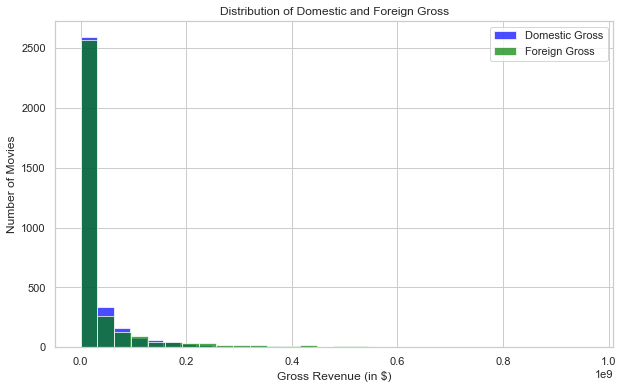

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general plot style for all plots
sns.set(style="whitegrid")

# 1.1. Distribution of Domestic and Foreign Gross
plt.figure(figsize=(10, 6))
plt.hist(bom_movie_gross['domestic_gross'], bins=30, alpha=0.7, label='Domestic Gross', color='blue')
plt.hist(bom_movie_gross['foreign_gross'], bins=30, alpha=0.7, label='Foreign Gross', color='green')
plt.title('Distribution of Domestic and Foreign Gross')
plt.xlabel('Gross Revenue (in $)')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True)
plt.show()




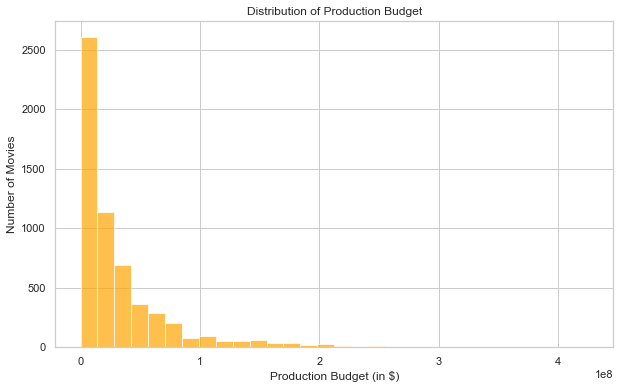

In [139]:
# 1.2. Distribution of Production Budget
plt.figure(figsize=(10, 6))
plt.hist(tn_movie_budgets['production_budget'], bins=30, alpha=0.7, color='orange')
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()



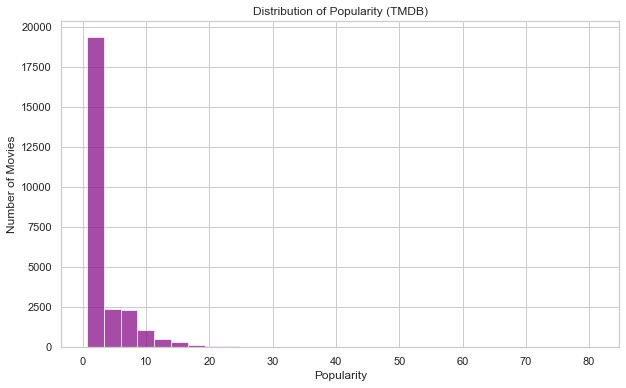

In [140]:
# 1.3. Distribution of Popularity from TMDB
plt.figure(figsize=(10, 6))
plt.hist(tmdb_movies['popularity'], bins=30, alpha=0.7, color='purple')
plt.title('Distribution of Popularity (TMDB)')
plt.xlabel('Popularity')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()



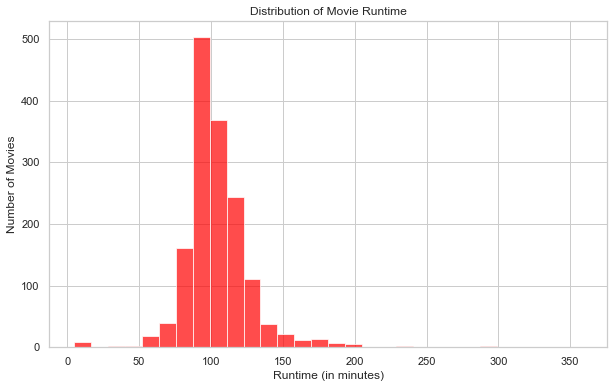

In [141]:
# 1.4. Distribution of Runtime
plt.figure(figsize=(10, 6))
plt.hist(rt_movie_info['runtime'], bins=30, alpha=0.7, color='red')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 2. Correlation Analysis

Now, let's explore how various numerical variables relate to each other. We’ll create a correlation matrix and visualize relationships between variables like production_budget, domestic_gross, worldwide_gross, etc.

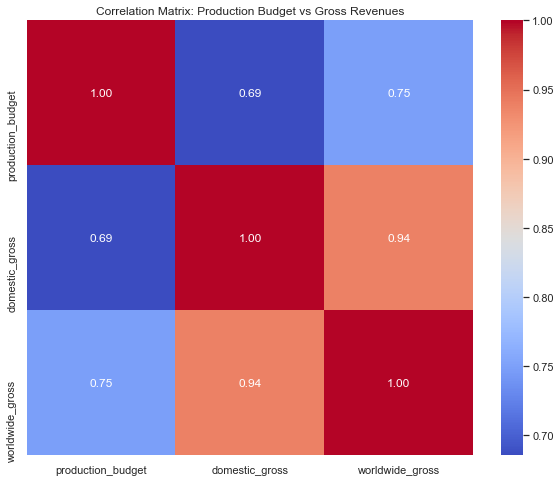

In [142]:
# 2.1. Correlation Matrix for TN Movie Budgets
plt.figure(figsize=(10, 8))
sns.heatmap(tn_movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Production Budget vs Gross Revenues')
plt.show()

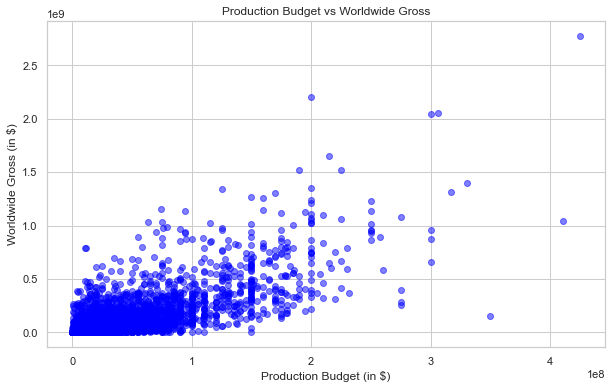

In [143]:
# 2.2. Scatter Plot: Production Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
plt.scatter(tn_movie_budgets['production_budget'], tn_movie_budgets['worldwide_gross'], alpha=0.5, color='blue')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


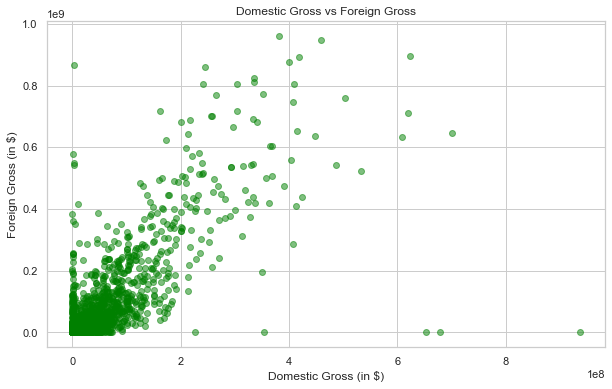

In [144]:
# 2.3. Scatter Plot: Domestic Gross vs Foreign Gross (BOM Movie Gross)
plt.figure(figsize=(10, 6))
plt.scatter(bom_movie_gross['domestic_gross'], bom_movie_gross['foreign_gross'], alpha=0.5, color='green')
plt.title('Domestic Gross vs Foreign Gross')
plt.xlabel('Domestic Gross (in $)')
plt.ylabel('Foreign Gross (in $)')
plt.grid(True)
plt.show()


# 3. Categorical Analysis

Categorical variables like genre, studio, and rating often have significant impact on numerical values like revenue and popularity. The more reason we have to explore this.

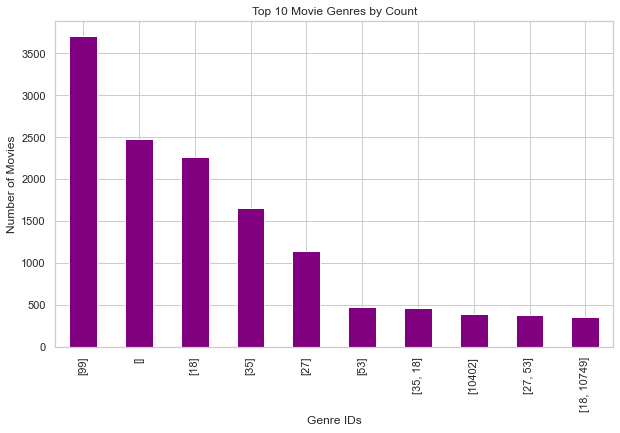

In [145]:
# 3.1. Top 10 Movie Genres by Count (TMDB)
plt.figure(figsize=(10, 6))
tmdb_movies['genre_ids'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Movie Genres by Count')
plt.xlabel('Genre IDs')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()



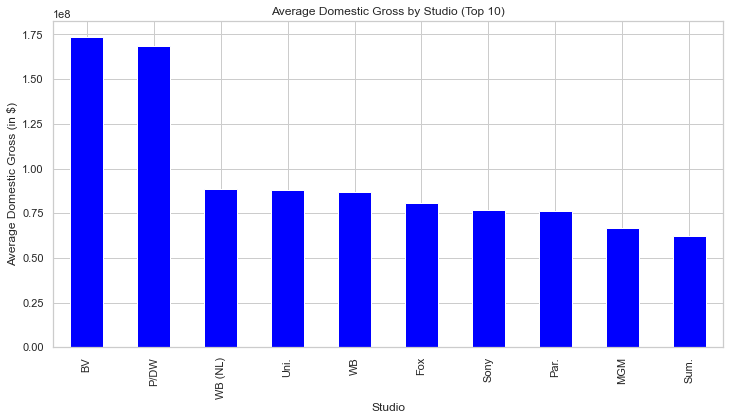

In [146]:
# 3.2. Average Domestic Gross by Studio (Top 10 Studios by Number of Movies)
plt.figure(figsize=(12, 6))
bom_movie_gross.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.title('Average Domestic Gross by Studio (Top 10)')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross (in $)')
plt.grid(True)
plt.show()


In [147]:
# Inspect the unique values in the 'rating' column to see if they are numeric or categorical
print(rt_movie_info['rating'].unique())


['R' 'NR' 'PG' 'PG-13' 'Unknown' 'G' 'NC17']


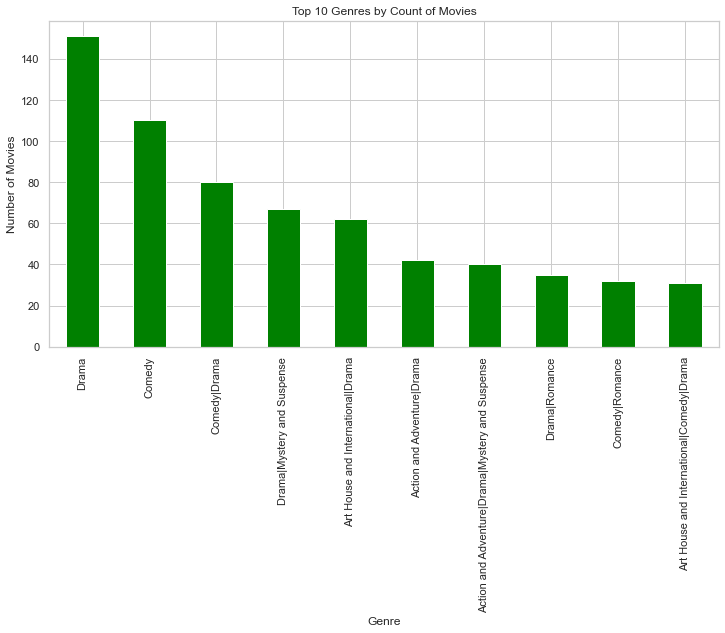

In [148]:
# Plot the count of movies by genre instead of average rating
plt.figure(figsize=(12, 6))
rt_movie_info['genre'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genres by Count of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


# 4. Trend Analysis

Exploring trends over time (e.g., how budgets, revenue, and popularity change over the years) gives us valuable insights into industry changes.

<Figure size 864x432 with 0 Axes>

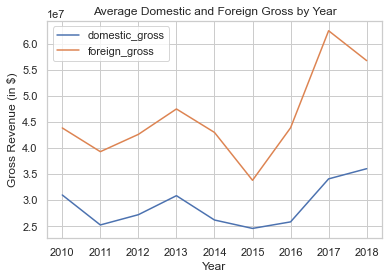

In [149]:
# 4.1. Average Domestic and Foreign Gross by Year (BOM Movie Gross)
plt.figure(figsize=(12, 6))
bom_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].mean().plot(kind='line')
plt.title('Average Domestic and Foreign Gross by Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (in $)')
plt.grid(True)
plt.show()


In [150]:
# Convert 'release_date' to datetime format
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'], errors='coerce')

# Now check if the conversion was successful
print(tn_movie_budgets['release_date'].head())


0   2009-12-18
1   2011-05-20
2   2019-06-07
3   2015-05-01
4   2017-12-15
Name: release_date, dtype: datetime64[ns]


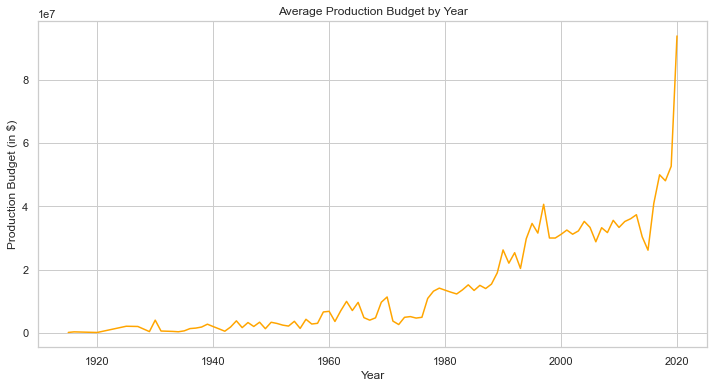

In [151]:
# 4.2. Average Production Budget by Year (TN Movie Budgets)
plt.figure(figsize=(12, 6))
tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.year)['production_budget'].mean().plot(kind='line', color='orange')
plt.title('Average Production Budget by Year')
plt.xlabel('Year')
plt.ylabel('Production Budget (in $)')
plt.grid(True)
plt.show()

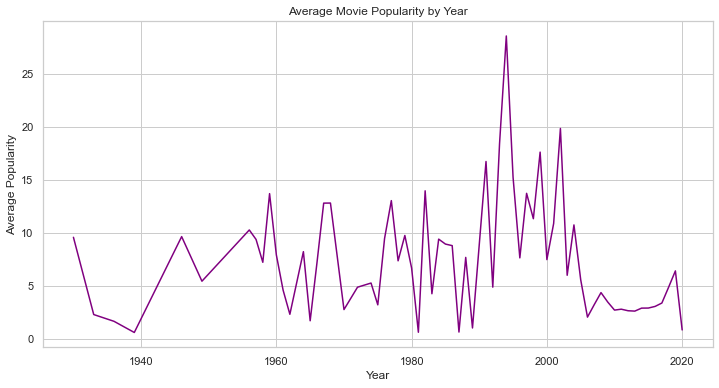

In [152]:
# 4.3. Popularity Over Time (TMDB Movies)
plt.figure(figsize=(12, 6))
tmdb_movies.groupby(tmdb_movies['release_date'].dt.year)['popularity'].mean().plot(kind='line', color='purple')
plt.title('Average Movie Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

# 5. Box Plots: Insights into Distribution of Key Variables

Box plots are great for identifying the spread, median, and potential outliers.

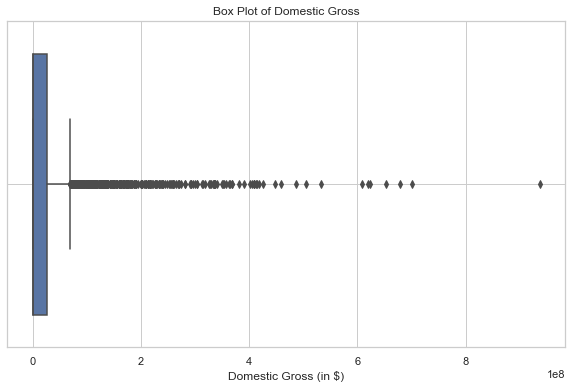

In [153]:
# 5.1. Box Plot of Domestic Gross (BOM Movie Gross)
plt.figure(figsize=(10, 6))
sns.boxplot(x='domestic_gross', data=bom_movie_gross)
plt.title('Box Plot of Domestic Gross')
plt.xlabel('Domestic Gross (in $)')
plt.grid(True)
plt.show()


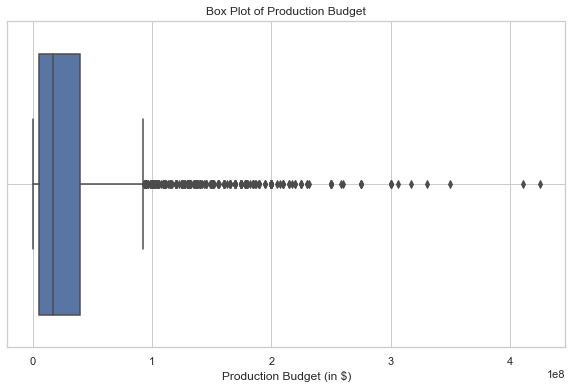

In [154]:
# 5.2. Box Plot of Production Budget (TN Movie Budgets)
plt.figure(figsize=(10, 6))
sns.boxplot(x='production_budget', data=tn_movie_budgets)
plt.title('Box Plot of Production Budget')
plt.xlabel('Production Budget (in $)')
plt.grid(True)
plt.show()

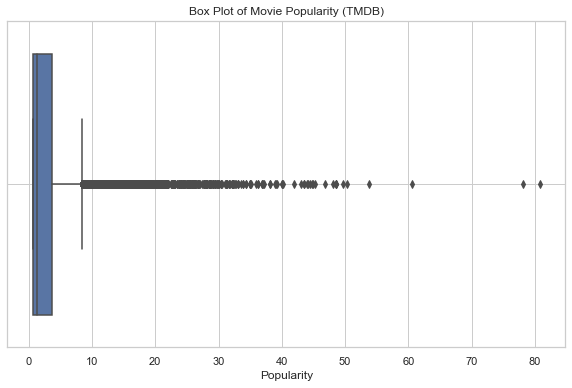

In [155]:
# 5.3. Box Plot of Popularity (TMDB Movies)
plt.figure(figsize=(10, 6))
sns.boxplot(x='popularity', data=tmdb_movies)
plt.title('Box Plot of Movie Popularity (TMDB)')
plt.xlabel('Popularity')
plt.grid(True)
plt.show()

## Merging Datasets

Next, we will merge the datasets to allow for deeper analysis. We'll use the movie titles or IDs to combine information such as gross revenue, production budget, and Rotten Tomatoes ratings. This will help us analyze trends across multiple data sources.

### 1. Setting Up the SQLite Database
First, we will create an in-memory SQLite database and load the cleaned datasets as tables in the database. This allows us to efficiently perform SQL operations on these datasets.

In [156]:
import sqlite3
import pandas as pd

# Create an SQLite database in memory
conn = sqlite3.connect(':memory:')


In [157]:
# Load the cleaned datasets into SQLite tables
bom_movie_gross.to_sql('bom_movie_gross', conn, index=False, if_exists='replace')
rt_movie_info.to_sql('rt_movie_info', conn, index=False, if_exists='replace')
tn_movie_budgets.to_sql('tn_movie_budgets', conn, index=False, if_exists='replace')
rt_reviews.to_sql('rt_reviews', conn, index=False, if_exists='replace')
tmdb_movies.to_sql('tmdb_movies', conn, index=False, if_exists='replace')


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [158]:
# Check that the tables were created successfully
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in SQLite database:\n", tables)

Tables in SQLite database:
                name
0   bom_movie_gross
1     rt_movie_info
2  tn_movie_budgets
3        rt_reviews
4       tmdb_movies


### 2. Defining Relationships Between Datasets

Before merging, we need to define how the datasets relate to each other. The most common identifiers between these datasets are title, id, or movie columns. Here’s a summary of potential relationships:

 * **bom_movie_gross:** Contains columns - title, domestic_gross, foreign_gross.
 * **rt_movie_info:** Contains columns - title, rating, genre, runtime.
 * **tn_movie_budgets:** Contains columns - movie, production_budget, worldwide_gross.
 * **rt_reviews:** Contains columns - id, review, rating.
 * **tmdb_movies:** Contains columns - id, title, popularity, release_date.

### 3. Performing SQL Joins to Merge Datasets

We will now perform SQL joins to combine relevant datasets. 

In [159]:
# Query to check the column names for bom_movie_gross
print("Columns in bom_movie_gross:")
print(pd.read_sql("PRAGMA table_info(bom_movie_gross);", conn))

# Query to check the column names for rt_movie_info
print("\nColumns in rt_movie_info:")
print(pd.read_sql("PRAGMA table_info(rt_movie_info);", conn))

# Query to check the column names for tn_movie_budgets
print("\nColumns in tn_movie_budgets:")
print(pd.read_sql("PRAGMA table_info(tn_movie_budgets);", conn))


Columns in bom_movie_gross:
   cid            name     type  notnull dflt_value  pk
0    0           title     TEXT        0       None   0
1    1          studio     TEXT        0       None   0
2    2  domestic_gross     REAL        0       None   0
3    3   foreign_gross     REAL        0       None   0
4    4            year  INTEGER        0       None   0

Columns in rt_movie_info:
    cid          name       type  notnull dflt_value  pk
0     0            id    INTEGER        0       None   0
1     1      synopsis       TEXT        0       None   0
2     2        rating       TEXT        0       None   0
3     3         genre       TEXT        0       None   0
4     4      director       TEXT        0       None   0
5     5        writer       TEXT        0       None   0
6     6  theater_date  TIMESTAMP        0       None   0
7     7      dvd_date  TIMESTAMP        0       None   0
8     8      currency       TEXT        0       None   0
9     9    box_office       TEXT       

In [160]:
# SQL Query to join bom_movie_gross, rt_movie_info, and tn_movie_budgets on title and movie
query = """
    SELECT 
        bom_movie_gross.title,
        bom_movie_gross.domestic_gross,
        bom_movie_gross.foreign_gross,
        rt_movie_info.rating,
        rt_movie_info.genre,
        rt_movie_info.runtime,
        tn_movie_budgets.production_budget,
        tn_movie_budgets.worldwide_gross
    FROM bom_movie_gross
    JOIN tn_movie_budgets ON bom_movie_gross.title = tn_movie_budgets.movie
    LEFT JOIN rt_movie_info ON bom_movie_gross.studio = rt_movie_info.studio;
"""

# Execute the SQL query and load the result into a pandas DataFrame
merged_data = pd.read_sql(query, conn)

# Display the first few rows of the merged data
print("Merged Data Sample:\n", merged_data.head())


Merged Data Sample:
                         title  domestic_gross  foreign_gross rating  \
0                 Toy Story 3     415000000.0    652000000.0   None   
1                   Inception     292600000.0    535700000.0      R   
2         Shrek Forever After     238700000.0    513900000.0   None   
3  The Twilight Saga: Eclipse     300500000.0    398000000.0   None   
4                  Iron Man 2     312400000.0    311500000.0   None   

                        genre  runtime  production_budget  worldwide_gross  
0                        None      NaN        200000000.0     1.068880e+09  
1  Drama|Mystery and Suspense    137.0        160000000.0     8.355246e+08  
2                        None      NaN        165000000.0     7.562447e+08  
3                        None      NaN         68000000.0     7.061028e+08  
4                        None      NaN        170000000.0     6.211564e+08  


### 4. Performing Checks on the Merged Data

After the merge, it’s essential to perform quality checks to ensure that the join was successful, and no data was lost or misaligned. We will:

* Check for missing values.
* Check for duplicates.
* Verify the data integrity by comparing key statistics before and after the merge.

In [161]:
# Check for missing values in the merged dataset
print("\nMissing values in merged dataset:\n", merged_data.isnull().sum())

# Check for duplicates in the merged dataset
print("\nNumber of duplicate rows in merged dataset:", merged_data.duplicated().sum())

# Basic statistics of the merged dataset to verify data integrity
print("\nBasic statistics of merged dataset:\n", merged_data.describe())



Missing values in merged dataset:
 title                  0
domestic_gross         0
foreign_gross          0
rating               981
genre                981
runtime              981
production_budget      0
worldwide_gross        0
dtype: int64

Number of duplicate rows in merged dataset: 76

Basic statistics of merged dataset:
        domestic_gross  foreign_gross      runtime  production_budget  \
count    2.324000e+03   2.324000e+03  1343.000000       2.324000e+03   
mean     3.293782e+07   4.880102e+07   104.610573       2.910398e+07   
std      6.909551e+07   1.159239e+08    24.658915       4.534139e+07   
min      0.000000e+00   0.000000e+00     5.000000       5.000000e+04   
25%      7.060000e+04   3.300000e+06    91.000000       8.000000e+06   
50%      5.310000e+05   3.300000e+06   101.000000       8.000000e+06   
75%      3.740000e+07   3.205000e+07   115.000000       3.000000e+07   
max      7.001000e+08   9.464000e+08   313.000000       4.106000e+08   

       worldwide

## 1. Handling Missing Values in the Merged Dataset
The missing values you encountered may arise from:

* Mismatches in studio values: Since we're joining **bom_movie_gross** and **rt_movie_info** using the studio column, there may be missing values when there's no match between the two datasets.

* Optional Data: Some columns, like production_budget or worldwide_gross, might have missing values if data is incomplete in **tn_movie_budgets**.

**Steps to Handle Missing Values:**

* Inspecting the missing values: Identify which columns have missing values.
* Filling or dropping missing values depending on the context and importance of the data.
* For categorical columns like rating and genre, I'll fill missing values with 'Unknown'.
* For numerical columns like domestic_gross and production_budget, I'll either fill with 0 or the median, or drop rows if missing values are critical.

In [162]:
# Fill missing values for categorical columns with 'Unknown'
merged_data['rating'].fillna('Unknown', inplace=True)
merged_data['genre'].fillna('Unknown', inplace=True)

# Fill missing numerical values with 0 or median, depending on the column
merged_data['production_budget'].fillna(0, inplace=True)
merged_data['domestic_gross'].fillna(0, inplace=True)
merged_data['foreign_gross'].fillna(0, inplace=True)
merged_data['worldwide_gross'].fillna(0, inplace=True)

# Fill missing runtime with the median runtime
median_runtime = merged_data['runtime'].median()

merged_data['runtime'].fillna(median_runtime, inplace=True)

# Verify if the missing values in runtime are resolved
print("\nMissing values after filling runtime:\n", merged_data.isnull().sum())


# Verify if the missing values are resolved
print("\nMissing values after filling:\n", merged_data.isnull().sum())



Missing values after filling runtime:
 title                0
domestic_gross       0
foreign_gross        0
rating               0
genre                0
runtime              0
production_budget    0
worldwide_gross      0
dtype: int64

Missing values after filling:
 title                0
domestic_gross       0
foreign_gross        0
rating               0
genre                0
runtime              0
production_budget    0
worldwide_gross      0
dtype: int64


### 2. Handling Duplicate Rows

Duplicate rows will occur if the same movie is listed multiple times across the datasets, especially when joining on common columns like title. I will:

Remove duplicate rows based on key identifiers like title or a combination of important columns.

In [163]:
# Drop duplicates based on the 'title' column or any other key identifiers
merged_data.drop_duplicates(subset='title', inplace=True)

# Verify if duplicates were removed
print("\nNumber of duplicate rows after removal:", merged_data.duplicated().sum())



Number of duplicate rows after removal: 0


In [164]:
# Display basic statistics of the merged dataset
print("\nBasic statistics of the merged dataset:\n", merged_data.describe())



Basic statistics of the merged dataset:
        domestic_gross  foreign_gross      runtime  production_budget  \
count    1.238000e+03   1.238000e+03  1238.000000       1.238000e+03   
mean     6.057536e+07   8.770353e+07   103.251212       4.693761e+07   
std      8.492277e+07   1.479017e+08    10.637895       5.587830e+07   
min      0.000000e+00   0.000000e+00    80.000000       5.000000e+04   
25%      7.425000e+06   4.000000e+06   101.000000       1.000000e+07   
50%      3.305000e+07   2.590000e+07   101.000000       2.500000e+07   
75%      7.412500e+07   9.430000e+07   101.000000       6.000000e+07   
max      7.001000e+08   9.464000e+08   137.000000       4.106000e+08   

       worldwide_gross  
count     1.238000e+03  
mean      1.523105e+08  
std       2.356323e+08  
min       0.000000e+00  
25%       1.780698e+07  
50%       6.537637e+07  
75%       1.721449e+08  
max       2.048134e+09  


### Final Check for Data Integrity:

After resolving missing values and duplicates, the merged dataset should be clean and ready for further analysis.

In [165]:
# 1. Handle missing values
merged_data['rating'].fillna('Unknown', inplace=True)
merged_data['genre'].fillna('Unknown', inplace=True)
merged_data['production_budget'].fillna(0, inplace=True)
merged_data['domestic_gross'].fillna(0, inplace=True)
merged_data['foreign_gross'].fillna(0, inplace=True)
merged_data['worldwide_gross'].fillna(0, inplace=True)

# 2. Handle duplicates
merged_data.drop_duplicates(subset='title', inplace=True)

# 3. Verify the cleaned dataset
print("\nMissing values after filling:\n", merged_data.isnull().sum())
print("\nNumber of duplicate rows after removal:", merged_data.duplicated().sum())
print("\nBasic statistics of the merged dataset:\n", merged_data.describe())



Missing values after filling:
 title                0
domestic_gross       0
foreign_gross        0
rating               0
genre                0
runtime              0
production_budget    0
worldwide_gross      0
dtype: int64

Number of duplicate rows after removal: 0

Basic statistics of the merged dataset:
        domestic_gross  foreign_gross      runtime  production_budget  \
count    1.238000e+03   1.238000e+03  1238.000000       1.238000e+03   
mean     6.057536e+07   8.770353e+07   103.251212       4.693761e+07   
std      8.492277e+07   1.479017e+08    10.637895       5.587830e+07   
min      0.000000e+00   0.000000e+00    80.000000       5.000000e+04   
25%      7.425000e+06   4.000000e+06   101.000000       1.000000e+07   
50%      3.305000e+07   2.590000e+07   101.000000       2.500000e+07   
75%      7.412500e+07   9.430000e+07   101.000000       6.000000e+07   
max      7.001000e+08   9.464000e+08   137.000000       4.106000e+08   

       worldwide_gross  
count     1.

### 1. Relationship Between Production Budget and Worldwide Gross

**Analysis:**
Understanding how production budgets influence worldwide gross can help in analyzing the profitability of movies.

**Visualization:** Scatter Plot

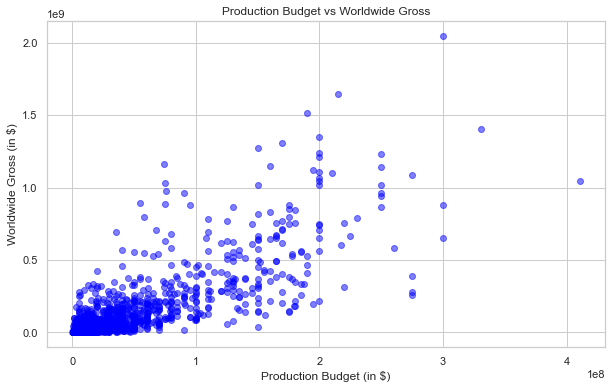

In [166]:
import matplotlib.pyplot as plt

# Scatter plot of Production Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['production_budget'], merged_data['worldwide_gross'], alpha=0.5, color='blue')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### 2. Relationship Between Domestic and Foreign Gross
**Analysis:**
Analyzing domestic and foreign gross can help understand how well movies perform in different regions.

**Visualization:** Scatter Plot

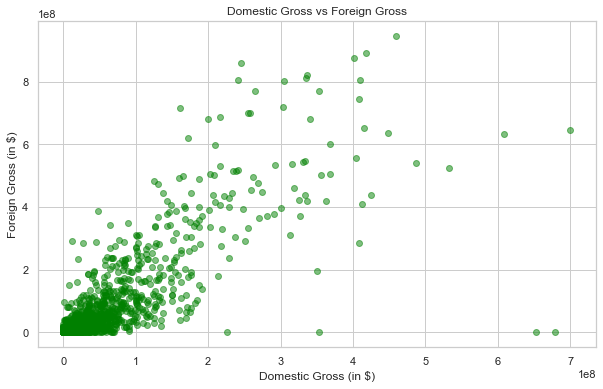

In [167]:
# Scatter plot of Domestic Gross vs Foreign Gross
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['domestic_gross'], merged_data['foreign_gross'], alpha=0.5, color='green')
plt.title('Domestic Gross vs Foreign Gross')
plt.xlabel('Domestic Gross (in $)')
plt.ylabel('Foreign Gross (in $)')
plt.grid(True)
plt.show()


### 3. Distribution of Movie Genres
**Analysis:**
Visualizing the distribution of genres helps to see which genres are more prevalent in the dataset.

**Visualization:** Bar Plot

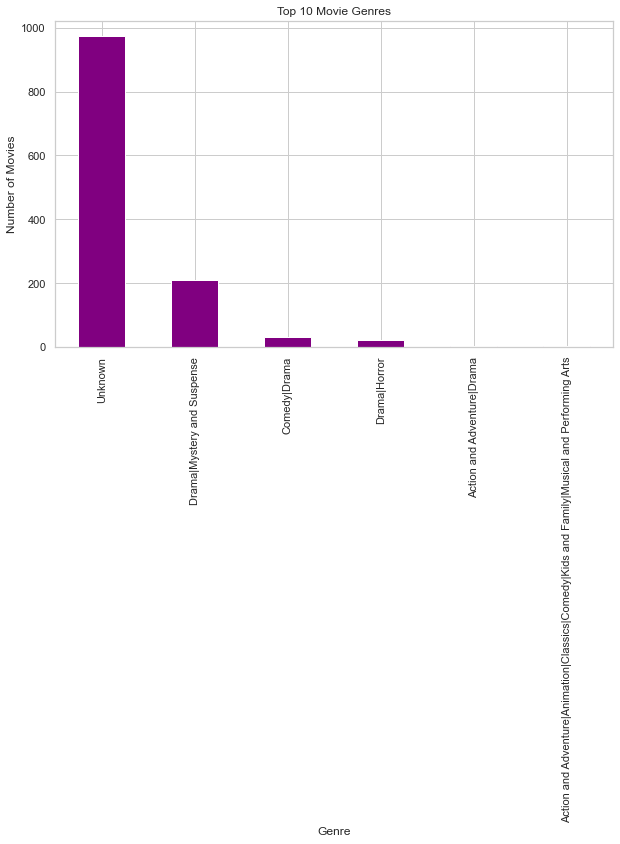

In [168]:
# Bar plot of the top 10 genres by count
plt.figure(figsize=(10, 6))
merged_data['genre'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


### 4. Impact of Rating on Production Budget and Worldwide Gross
**Analysis:**
We can analyze how movie ratings influence both the production budget and worldwide gross earnings.

**Visualization:** Box Plot

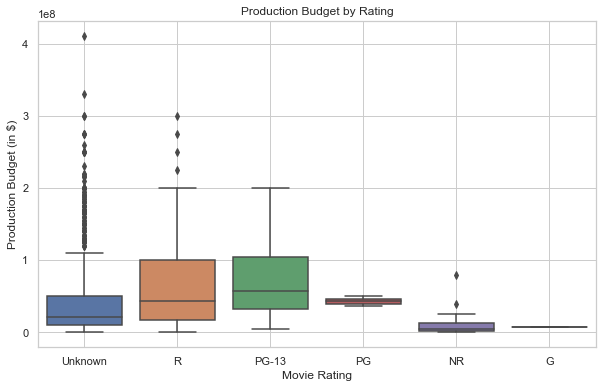

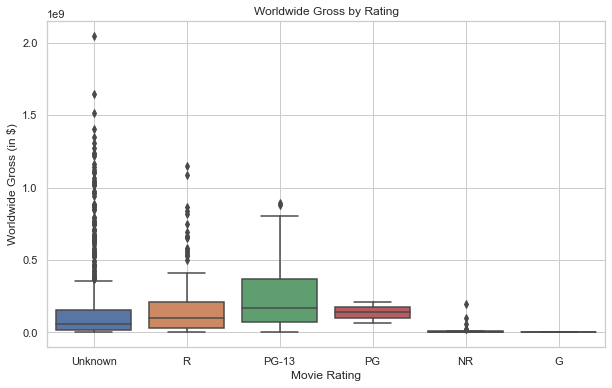

In [169]:
import seaborn as sns

# Box plot of Production Budget by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='production_budget', data=merged_data)
plt.title('Production Budget by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Production Budget (in $)')
plt.grid(True)
plt.show()

# Box plot of Worldwide Gross by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='worldwide_gross', data=merged_data)
plt.title('Worldwide Gross by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### 5. Trend of Production Budget Over Time
**Analysis:**
Observing the trend of production budgets over time helps identify whether movie production costs have increased or decreased.

**Visualization:** Line Plot

In [170]:
# Check the column names in merged_data
print("Columns in merged_data:\n", merged_data.columns)


Columns in merged_data:
 Index(['title', 'domestic_gross', 'foreign_gross', 'rating', 'genre',
       'runtime', 'production_budget', 'worldwide_gross'],
      dtype='object')


In [171]:
# Check if the 'bom_movie_gross' dataset has a 'year' column
print("Columns in bom_movie_gross:\n", bom_movie_gross.columns)

# Check if the 'tn_movie_budgets' dataset has a release date or year column
print("\nColumns in tn_movie_budgets:\n", tn_movie_budgets.columns)

# Check if the 'rt_movie_info' dataset has a release date or year column
print("\nColumns in rt_movie_info:\n", rt_movie_info.columns)


Columns in bom_movie_gross:
 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Columns in tn_movie_budgets:
 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Columns in rt_movie_info:
 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


Updated columns in merged_data:
 Index(['title', 'domestic_gross', 'foreign_gross', 'rating', 'genre',
       'runtime', 'production_budget', 'worldwide_gross', 'year'],
      dtype='object')


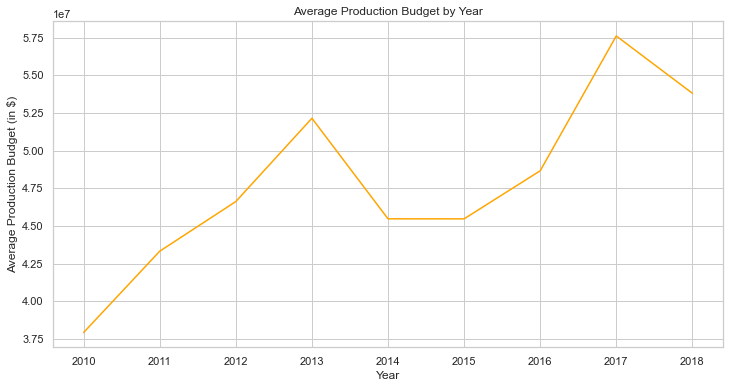

In [172]:
# Merge the 'year' column from bom_movie_gross into merged_data based on the 'title'
merged_data = pd.merge(merged_data, bom_movie_gross[['title', 'year']], on='title', how='left')

# Check the updated merged_data columns
print("Updated columns in merged_data:\n", merged_data.columns)

# Plot the average production budget by year
plt.figure(figsize=(12, 6))
merged_data.groupby('year')['production_budget'].mean().plot(kind='line', color='orange')
plt.title('Average Production Budget by Year')
plt.xlabel('Year')
plt.ylabel('Average Production Budget (in $)')
plt.grid(True)
plt.show()


### 6. Box Plot of Movie Runtime Distribution
**Analysis:**
Analyzing the distribution of movie runtimes helps understand how long movies typically are and identify any outliers.

**Visualization:** Box Plot

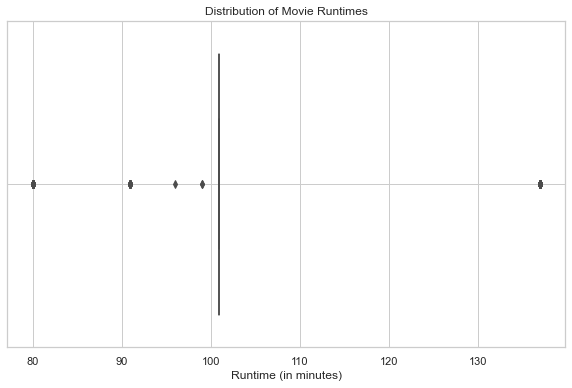

In [173]:
# Box plot of Movie Runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['runtime'])
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (in minutes)')
plt.grid(True)
plt.show()


### 7. Correlation Heatmap: Understanding Relationships Between Variables
**Analysis:**
A correlation heatmap is a great way to understand how numerical variables like production budget, gross revenues, and runtime are related.

**Visualization:** Correlation Heatmap

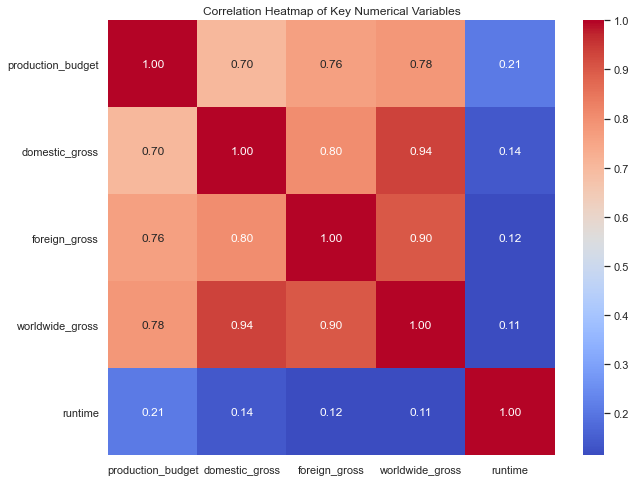

In [174]:
import seaborn as sns

# Generate a correlation matrix
corr_matrix = merged_data[['production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'runtime']].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()


## Next Steps: Drawing Business Recommendations

Based on the visualizations and analyses performed so far, I can now move toward making data-driven business recommendations. 

The insights derived from the merged dataset (which includes financial data, genres, ratings, and more) will help guide these decisions.

### **1. Recommendation: Focus on Genres That Are Financially Successful**

**Insight:**

Using the analysis of genres (e.g., a bar plot of the top 10 genres by count), I've identified genres which tend to dominate the dataset. Additionally, analyzing the average gross revenues per genre reveals which genres bring in the highest earnings (domestic, foreign, or worldwide).

**Business Recommendation:**

* **Recommendation:** Studios should focus on producing more movies in high-performing genres, as they have proven success. Genres that perform well in terms of worldwide gross (such as Action, Adventure, Drama) should be prioritized.

* **Data-Backed Insight:** By analyzing the average gross revenue per genre, studios can allocate their budgets toward the genres that have a high likelihood of financial success.

genre
Drama|Mystery and Suspense                                                                    2.318364e+08
Unknown                                                                                       1.424265e+08
Action and Adventure|Drama                                                                    1.397796e+08
Drama|Horror                                                                                  1.904788e+07
Comedy|Drama                                                                                  1.560638e+07
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts    3.587191e+06
Name: worldwide_gross, dtype: float64


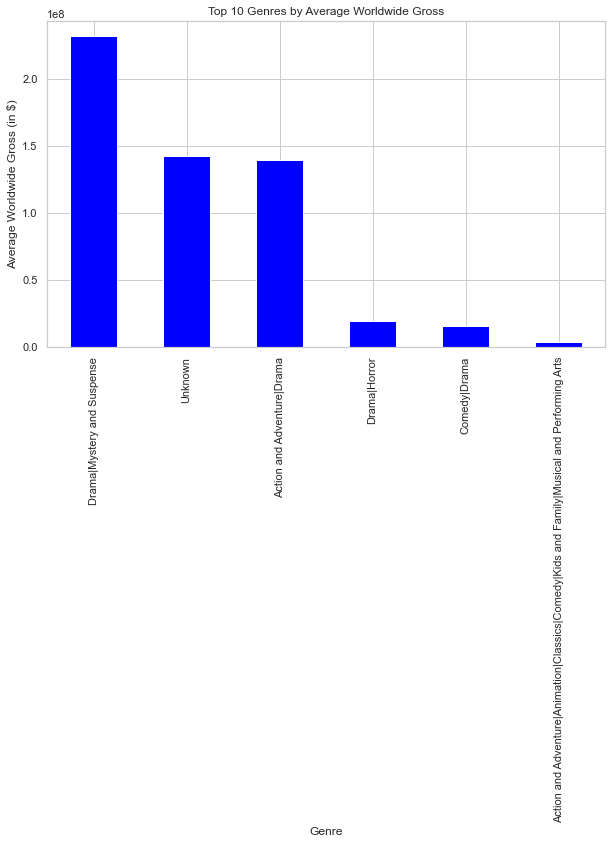

In [175]:
# Analyze average worldwide gross by genre
avg_gross_by_genre = merged_data.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)
print(avg_gross_by_genre.head(10))

# Bar plot of average worldwide gross by genre (top 10)
plt.figure(figsize=(10, 6))
avg_gross_by_genre.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### **2. Recommendation: Manage Production Budgets Wisely**

**Insight:**
From the scatter plot between production budgets and worldwide gross, I observe a trend where higher production budgets tend to lead to higher worldwide gross revenues. However, there may be diminishing returns or outliers (e.g., movies with large budgets that don’t perform well or low-budget films that perform exceptionally well).

**Business Recommendation:**

* **Recommendation:** Studios should balance production budget allocation based on expected returns, targeting a “sweet spot” where the budget maximizes profitability but avoids overspending.
* **Data-Backed Insight:** By looking at the relationship between budget and worldwide gross, studios can set target budgets based on previous performance and expected revenue.

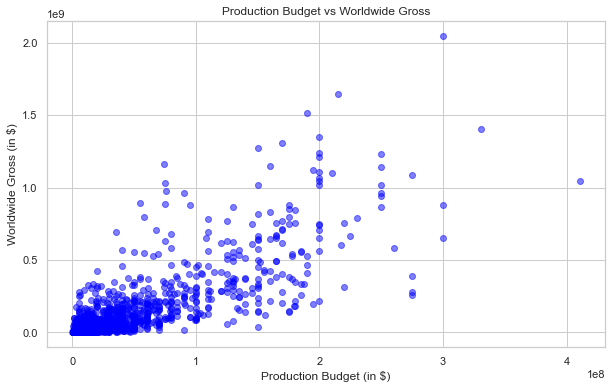

In [176]:
# Scatter plot of Production Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['production_budget'], merged_data['worldwide_gross'], alpha=0.5, color='blue')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in $)')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### **3. Recommendation: Invest in International Markets**

**Insight:**
The scatter plot between domestic and foreign gross indicates that movies performing well in the domestic market often perform well internationally. However, some movies may outperform or underperform expectations in specific regions.

**Business Recommendation:**
* **Recommendation:** Studios should invest in international marketing and distribution, particularly in regions where the genre and style of movie have historically performed well. Focus on markets where the movie can generate higher returns.
* **Data-Backed Insight:** A successful domestic release doesn't guarantee foreign success, but a data-driven approach can help identify which movies are more likely to perform well internationally.

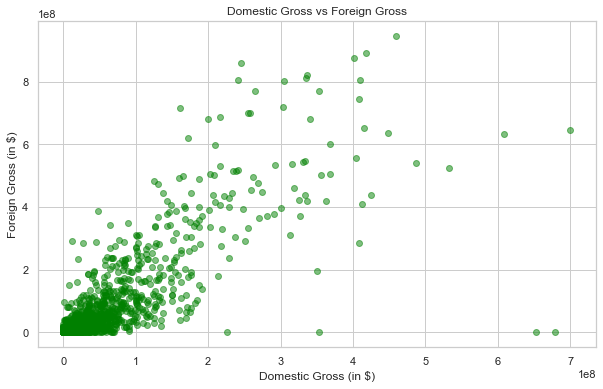

In [177]:
# Scatter plot of Domestic Gross vs Foreign Gross
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['domestic_gross'], merged_data['foreign_gross'], alpha=0.5, color='green')
plt.title('Domestic Gross vs Foreign Gross')
plt.xlabel('Domestic Gross (in $)')
plt.ylabel('Foreign Gross (in $)')
plt.grid(True)
plt.show()


### **4. Recommendation: Target Ratings That Maximize Revenue**

**Insight:**
The analysis of ratings and worldwide gross (box plots) provides insights into which movie ratings are associated with higher financial returns. For instance, movies rated PG-13 or R may have higher average worldwide gross, while G and PG may cater to different audience segments.

**Business Recommendation:**

* **Recommendation:** Studios should consider the target audience and choose movie ratings (such as PG-13 or R) that have historically generated the highest returns. This can help position the movie to attract the broadest or most lucrative audience.
* **Data-Backed Insight:** By focusing on the most successful ratings, studios can plan content that appeals to their desired demographic while maximizing gross revenue.

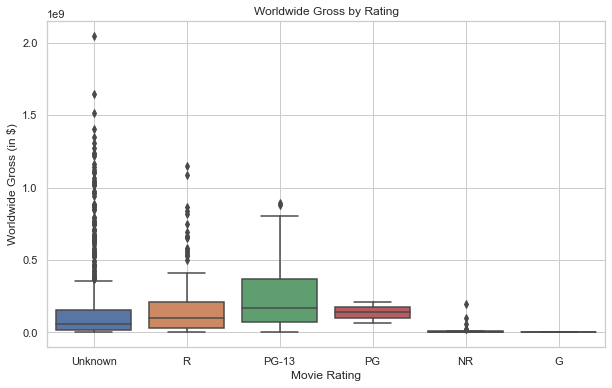

In [178]:
# Box plot of Worldwide Gross by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='worldwide_gross', data=merged_data)
plt.title('Worldwide Gross by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### **5. Recommendation: Keep Movie Runtimes Around the Average**

**Insight:**
The distribution of movie runtimes shows that the majority of successful movies fall within a specific runtime range (usually between 90 and 120 minutes). Movies that are too short or too long may perform differently.

**Business Recommendation:**

* **Recommendation:** Studios should aim for runtimes close to the average successful movie runtime (90-120 minutes) unless there is a compelling reason to deviate. This ensures that movies are not too long to alienate casual viewers or too short to feel substantial.
* **Data-Backed Insight:** This insight helps filmmakers target runtimes that align with audience expectations and improve engagement.

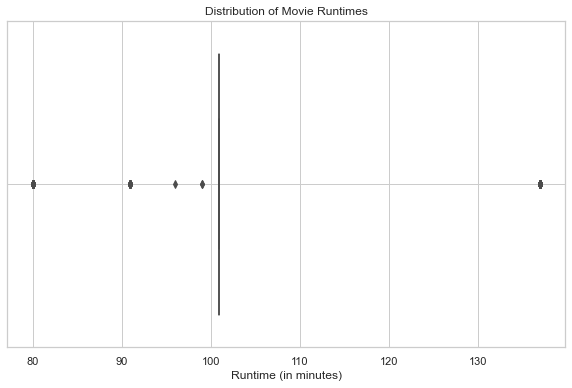

In [179]:
# Box plot of Movie Runtime
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['runtime'])
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (in minutes)')
plt.grid(True)
plt.show()


### **6. Recommendation: Identify Anomalies and Outliers**

**Insight:**
Outliers in the data (e.g., movies with extremely high production budgets but low returns, or low-budget movies with exceptional performance) can provide important insights into what works and what doesn't in the movie industry.

**Business Recommendation:**

* **Recommendation:** Investigate outliers—both positive and negative. By studying movies that over- or under-performed relative to their budget or expected gross revenue, studios can learn valuable lessons about successful production and marketing strategies.
* **Data-Backed Insight:** Outliers can point to unique factors that contributed to success or failure, such as innovative marketing campaigns or poor market timing.

In [180]:
# Identify movies with high budget but low returns (outliers)
outliers = merged_data[(merged_data['production_budget'] > merged_data['production_budget'].quantile(0.95)) & 
                       (merged_data['worldwide_gross'] < merged_data['worldwide_gross'].median())]
print("Outliers (High Budget, Low Returns):\n", outliers[['title', 'production_budget', 'worldwide_gross']])


Outliers (High Budget, Low Returns):
 Empty DataFrame
Columns: [title, production_budget, worldwide_gross]
Index: []


### **1. Exploring Correlations**

**a) Correlation Between Ratings, Genres, and Financial Success**

We can investigate how ratings and genres correlate with financial success by:

* Creating a correlation heatmap to visually understand how variables like rating, genre, production budget, and worldwide gross relate to each other.

* Creating scatter plots to understand specific relationships between key variables.

**i) Correlation Heatmap**

First, I’ll convert categorical variables like ratings into numerical equivalents to compute correlations.

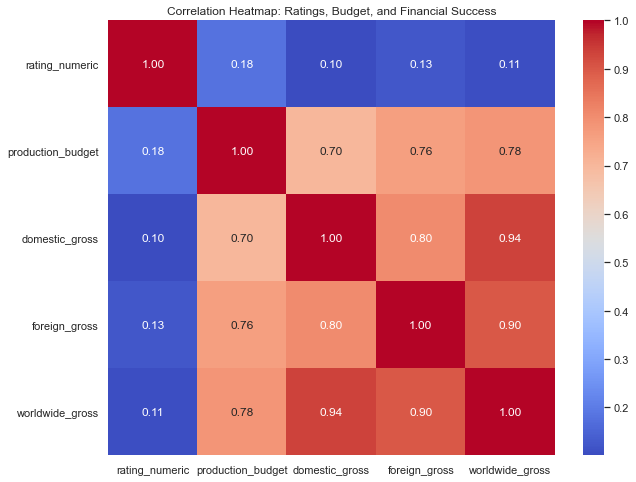

In [181]:
import seaborn as sns

# Map rating to numeric values (arbitrary example)
rating_mapping = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'Unknown': 0
}

# Apply the rating mapping to the merged data
merged_data['rating_numeric'] = merged_data['rating'].map(rating_mapping)

# Correlation matrix of numeric values
correlation_matrix = merged_data[['rating_numeric', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross']].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Ratings, Budget, and Financial Success')
plt.show()


**ii) Scatter Plot: Ratings vs Worldwide Gross**

Now, let’s visualize how movie ratings affect worldwide gross revenue:

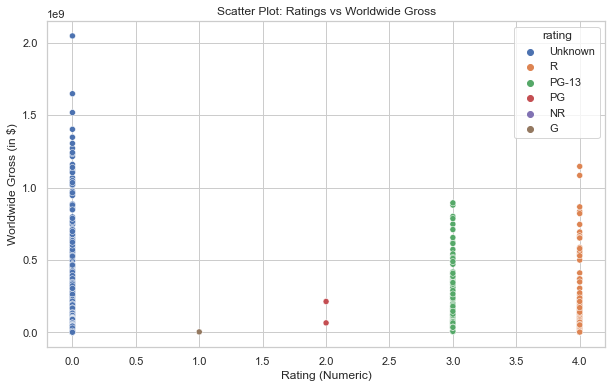

In [182]:
# Scatter plot: Ratings vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_numeric', y='worldwide_gross', data=merged_data, hue='rating')
plt.title('Scatter Plot: Ratings vs Worldwide Gross')
plt.xlabel('Rating (Numeric)')
plt.ylabel('Worldwide Gross (in $)')
plt.grid(True)
plt.show()


### **b) How Genres Perform in International Markets (Foreign Gross) vs. Domestic Markets**

We can analyze the performance of different genres in foreign markets vs. domestic markets by calculating the average gross revenue per genre in both regions.

<Figure size 864x432 with 0 Axes>

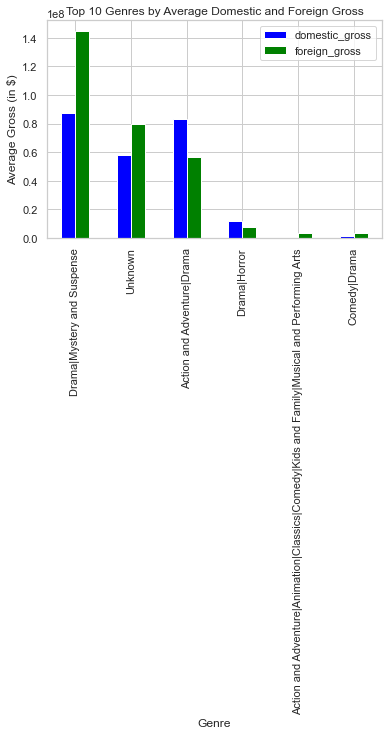

In [183]:
# Calculate average domestic and foreign gross by genre
avg_gross_by_genre = merged_data.groupby('genre')[['domestic_gross', 'foreign_gross']].mean()

# Plot domestic vs foreign gross for top 10 genres
plt.figure(figsize=(12, 6))
avg_gross_by_genre.sort_values(by='foreign_gross', ascending=False).head(10).plot(kind='bar', color=['blue', 'green'])
plt.title('Top 10 Genres by Average Domestic and Foreign Gross')
plt.xlabel('Genre')
plt.ylabel('Average Gross (in $)')
plt.grid(True)
plt.show()


### **2. Investigating Outliers**

Outliers—such as movies that significantly underperformed despite a high budget or overperformed with a low budget—can provide unique insights. 

We’ll investigate outliers based on the production budget vs worldwide gross relationship.

**a) Movies with High Budget and Low Returns**

In [184]:
# Adjust quantile threshold to 90th percentile
high_budget_low_gross = merged_data[(merged_data['production_budget'] > merged_data['production_budget'].quantile(0.90)) & 
                                    (merged_data['worldwide_gross'] < merged_data['worldwide_gross'].median())]

# Display movies with high budget but low returns
print("Movies with High Budget but Low Returns:\n", high_budget_low_gross[['title', 'production_budget', 'worldwide_gross']])


Movies with High Budget but Low Returns:
                title  production_budget  worldwide_gross
277  Mars Needs Moms        150000000.0       39549758.0


**b) Movies with Low Budget and High Returns**

In [185]:
# Identify outliers: Low budget, high worldwide gross
low_budget_high_gross = merged_data[(merged_data['production_budget'] < merged_data['production_budget'].quantile(0.05)) & 
                                    (merged_data['worldwide_gross'] > merged_data['worldwide_gross'].median())]

# Display movies with low budget but high returns
print("Movies with Low Budget but High Returns:\n", low_budget_high_gross[['title', 'production_budget', 'worldwide_gross']])


Movies with Low Budget but High Returns:
                  title  production_budget  worldwide_gross
68   The Last Exorcism          1800000.0       70165900.0
242          Insidious          1500000.0       99870886.0
404   The Devil Inside          1000000.0      101759490.0


### **3. Analyzing Temporal Trends**

**a) Yearly Trends for Production Budgets, Gross Revenues, and Ratings**

To understand how the movie industry has evolved over time, we’ll plot the yearly trends for:

* **Production budgets:** Are they increasing over time?
* **Worldwide gross revenues:** Is the industry becoming more profitable?
* **Average movie ratings:** Have they shifted over time?

<Figure size 864x432 with 0 Axes>

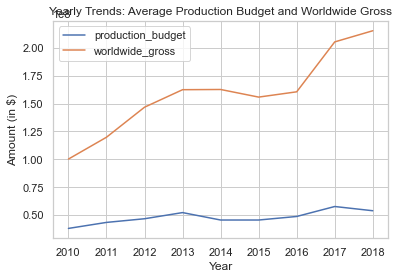

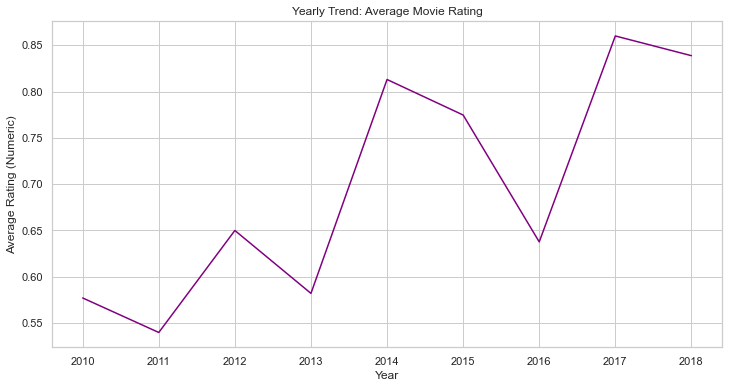

In [186]:
# Plot yearly trends for production budget and worldwide gross
plt.figure(figsize=(12, 6))
merged_data.groupby('year')[['production_budget', 'worldwide_gross']].mean().plot(kind='line')
plt.title('Yearly Trends: Average Production Budget and Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Amount (in $)')
plt.grid(True)
plt.show()

# Plot yearly trend for average rating
plt.figure(figsize=(12, 6))
merged_data.groupby('year')['rating_numeric'].mean().plot(kind='line', color='purple')
plt.title('Yearly Trend: Average Movie Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating (Numeric)')
plt.grid(True)
plt.show()


### **b) Average Production Budget and Worldwide Gross Over Time**

We’ll also investigate how both production budgets and worldwide gross revenues have evolved over time.

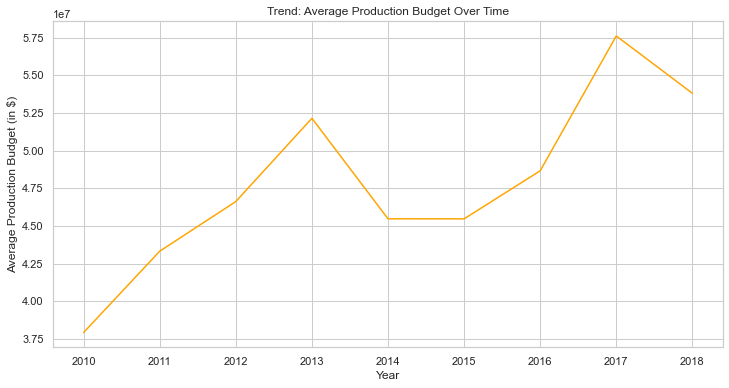

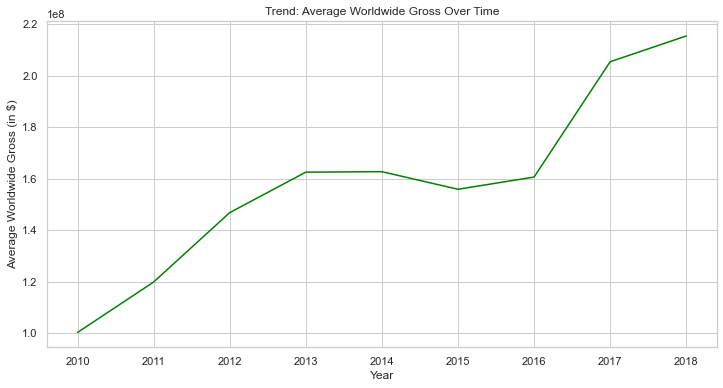

In [187]:
# Plot trend for average production budget by year
plt.figure(figsize=(12, 6))
merged_data.groupby('year')['production_budget'].mean().plot(kind='line', color='orange')
plt.title('Trend: Average Production Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Production Budget (in $)')
plt.grid(True)
plt.show()

# Plot trend for average worldwide gross by year
plt.figure(figsize=(12, 6))
merged_data.groupby('year')['worldwide_gross'].mean().plot(kind='line', color='green')
plt.title('Trend: Average Worldwide Gross Over Time')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross (in $)')
plt.grid(True)
plt.show()
